In [14]:
#import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Question 1

Suppose the globe tossing data had turned out to be 8 water in 15 tosses.
Construct the posterior distribution, using grid approximation. Use the
same flat prior as before.

posterior mean =  0.5294117647059023
{0.0: 0.0, 0.01: 9.59654482205e-14, 0.02: 2.29778099034086e-11, 0.03: 5.687868336803261e-10, 0.04: 5.639243737508639e-09, 0.05: 3.3725496864777955e-08, 0.06: 1.4586884344434806e-07, 0.07: 5.03004731412787e-07, 0.08: 1.4666189980482522e-06, 0.09: 3.756950548018014e-06, 0.1: 8.681495430417813e-06, 0.11: 1.8443523715578167e-05, 0.12: 3.653596647675357e-05, 0.13: 6.822070450383832e-05, 0.14: 0.00012108737722843125, 0.15: 0.00020567972652488057, 0.16: 0.00033617157933580146, 0.17: 0.0005310692064305026, 0.18: 0.0008139122757441983, 0.19: 0.001213942194205192, 0.2: 0.0017667044852003686, 0.21: 0.0025145510977287147, 0.22: 0.0035070092404767975, 0.23: 0.00480098546962129, 0.24: 0.006460777265330356, 0.25: 0.008557869089146568, 0.26: 0.011170495758633889, 0.27: 0.014382962706338062, 0.28: 0.018284720078764603, 0.29: 0.02296919542999544, 0.3: 0.028532397715436, 0.31: 0.035071313133530804, 0.32: 0.042682120842431004, 0.33: 0.05145826345304837, 0.34: 0.0614884

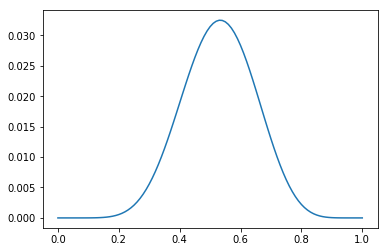

In [15]:
grid_points = 101

N, W = 15, 8

p = np.linspace(0, 1, grid_points)

prior = np.repeat(1, grid_points)

likelihood = stats.binom.pmf(W,N,p)

posterior = likelihood * prior
posterior /= posterior.sum()
print("posterior mean = ", (posterior*p).sum())

cum_sum = np.cumsum(posterior)
dic = dict(zip(p, cum_sum))
print(dic)


d = 0.0005
mask = (p >= 0.7 - d) & (p <= 0.7 + d)
print("p = ", p[mask], ", posterior = ", posterior[mask])

plt.plot(p, posterior)


In [16]:
samples = np.random.choice(p, p=posterior, size=int(1e4), replace=True)

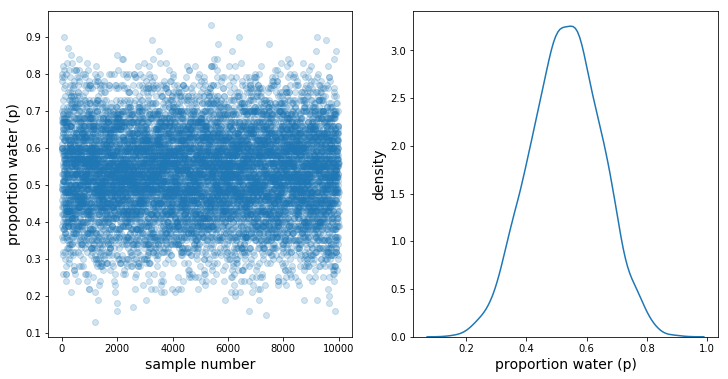

In [17]:
_, (ax0, ax1) = plt.subplots(1,2, figsize=(12,6))
ax0.plot(samples, 'o', alpha=0.2)
ax0.set_xlabel('sample number', fontsize=14)
ax0.set_ylabel('proportion water (p)', fontsize=14)
sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)', fontsize=14)
ax1.set_ylabel('density', fontsize=14);

Question 2

Start over in 1, but now use a prior that is zero below p = 0.5 and a con-
stant above p = 0.5. This corresponds to prior information that a majority
of the Earth’s surface is water. What difference does the better prior make?
If it helps, compare posterior distributions (using both priors) to the true
value p = 0.7.

posterior mean =  0.6038934815908517
{0.0: 0.0, 0.01: 0.0, 0.02: 0.0, 0.03: 0.0, 0.04: 0.0, 0.05: 0.0, 0.06: 0.0, 0.07: 0.0, 0.08: 0.0, 0.09: 0.0, 0.1: 0.0, 0.11: 0.0, 0.12: 0.0, 0.13: 0.0, 0.14: 0.0, 0.15: 0.0, 0.16: 0.0, 0.17: 0.0, 0.18: 0.0, 0.19: 0.0, 0.2: 0.0, 0.21: 0.0, 0.22: 0.0, 0.23: 0.0, 0.24: 0.0, 0.25: 0.0, 0.26: 0.0, 0.27: 0.0, 0.28: 0.0, 0.29: 0.0, 0.3: 0.0, 0.31: 0.0, 0.32: 0.0, 0.33: 0.0, 0.34: 0.0, 0.35000000000000003: 0.0, 0.36: 0.0, 0.37: 0.0, 0.38: 0.0, 0.39: 0.0, 0.4: 0.0, 0.41000000000000003: 0.0, 0.42: 0.0, 0.43: 0.0, 0.44: 0.0, 0.45: 0.0, 0.46: 0.0, 0.47000000000000003: 0.0, 0.48: 0.0, 0.49: 0.0, 0.5: 0.05118674214729962, 0.51: 0.10325120511227048, 0.52: 0.15589204802470083, 0.53: 0.20879737300458615, 0.54: 0.26164948230486684, 0.55: 0.31412980979538985, 0.56: 0.36592391988492673, 0.5700000000000001: 0.4167264636368568, 0.58: 0.46624598124680794, 0.59: 0.5142094422934794, 0.6: 0.5603664202524725, 0.61: 0.6044928056093448, 0.62: 0.6463939723802669, 0.63: 0.685907

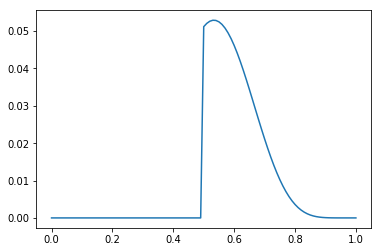

In [18]:
prior = p >= 0.5     #because we normalise below, no need to define prior to equal 2 when p >= 0.5

likelihood = stats.binom.pmf(W,N,p)

posterior = likelihood * prior
posterior /= posterior.sum()

print("posterior mean = ", (posterior*p).sum())

cum_sum = np.cumsum(posterior)
dic = dict(zip(p, cum_sum))
print(dic)

print("p = ", p[mask], ", posterior = ", posterior[mask])

plt.plot(p, posterior)


With the truncated prior, the posterior has a much greater (almost double) value of probability at p ~ 0.7, so the prior has allowed the 'true' value to be expressed with more certainty.

Question 3

This problem is more open-ended than the others. Feel free to collabo-
rate on the solution. Suppose you want to estimate the Earth’s proportion of
water very precisely. Specifically, you want the 99% percentile interval of the
posterior distribution of p to be only 0.05 wide. This means the distance be-
tween the upper and lower bound of the interval should be 0.05. How many
times will you have to toss the globe to do this? I won’t require a precise
answer. I’m honestly more interested in your approach.


ROSS: We use an analytical solution that uses the conjugate prior to the binomial distribution - the beta prior - to simplify the problem.

[(1000, 0.08125921404798842), (2000, 0.05752802210543995), (3000, 0.046990269452137634), (4000, 0.04070292898671907), (5000, 0.03641018819601349), (6000, 0.03324046959718663), (7000, 0.03077645902192877), (8000, 0.028789979105732222), (9000, 0.027144360358497543), (10000, 0.025752090290357132)]


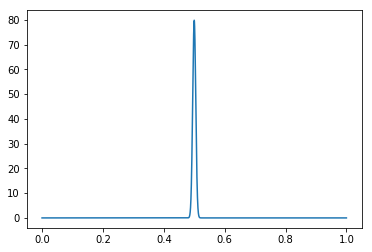

In [19]:
grid = 100000

start = 1000
p = 0.5      #parameter representing proportion of water on earth.  
             #For maximum uncertainty, we could set this as p = 0.5.

n = np.linspace(start, start*10, 10, dtype=int)     #num of trials
w = n*p     #assume realised number of trials sampling water equals expected value

i = n.shape[0]-1

x = np.linspace(0,1,grid)
plt.plot(x, stats.beta.pdf(x , w[i]+1, n[i]-w[i]+1),
         label='True posterior')

ci = 0.99     #confidence / plausability interval
low = (1-ci)/2
up = (1+ci)/2

lower = stats.beta.ppf(low, w+1, n-w+1)
upper = stats.beta.ppf(up , w+1, n-w+1)
diff = upper - lower

print(list(zip(n, diff)))

We see that we need at most 3000 trials to realise a 95% confidence / plausability interval with width less than 0.05.